<a href="https://colab.research.google.com/github/Uzma-Jawed/ML-using-Python/blob/main/Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning using Python

## Detecting and Preventing Overfitting and Underfitting

In this notebook, we will learn how to **detect and prevent overfitting/underfitting** using a Decision Tree classifier.  
We’ll train the model with different tree depths and compare the performance on training vs testing data.

---

### 1. Importing Required Libraries
We will use:
- `sklearn.datasets.make_classification` → to generate synthetic classification data  
- `train_test_split` → to split data into train & test sets  
- `DecisionTreeClassifier` → our ML model  
- `accuracy_score` → to measure performance  
- `matplotlib` → for visualization


In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

---

### 2. Generating Synthetic Dataset

We create a classification dataset with:
- **9000 samples**  
- **18 features** in total  
- **4 informative** features (actually useful for classification)  
- **12 redundant** features (linear combinations of informative ones)

This helps us simulate a realistic dataset.


In [45]:
X, y = make_classification(n_samples = 9000, n_features = 18, n_informative = 4, n_redundant = 12, random_state = 4)

---

### 3. Splitting the Dataset
We divide the dataset into:
- **70% training set** → used to fit the model  
- **30% testing set** → used to evaluate model performance


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

---

### 4. Training and Evaluating with Different Depths

A decision tree’s complexity is controlled by `max_depth`:
- Very **small depth** → underfitting (model too simple).  
- Very **large depth** → overfitting (model memorizes training data).

We will:
- Train decision trees with depths from **1 to 20**.  
- Record **training accuracy** and **testing accuracy**.  
- Compare them to detect overfitting or underfitting.


In [47]:
train_scores, test_scores = list(), list()

In [48]:
values = [i for i in range(1, 21)]

In [49]:
for i in values:
    # define model with max_depth = i
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # accuracy on training set
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)

    # accuracy on test set
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)

    # store results
    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print('>Depth=%d, Train Accuracy=%.3f, Test Accuracy=%.3f' % (i, train_acc, test_acc))

>Depth=1, Train Accuracy=0.835, Test Accuracy=0.840
>Depth=2, Train Accuracy=0.848, Test Accuracy=0.857
>Depth=3, Train Accuracy=0.864, Test Accuracy=0.873
>Depth=4, Train Accuracy=0.883, Test Accuracy=0.887
>Depth=5, Train Accuracy=0.919, Test Accuracy=0.914
>Depth=6, Train Accuracy=0.933, Test Accuracy=0.921
>Depth=7, Train Accuracy=0.955, Test Accuracy=0.942
>Depth=8, Train Accuracy=0.960, Test Accuracy=0.942
>Depth=9, Train Accuracy=0.971, Test Accuracy=0.946
>Depth=10, Train Accuracy=0.979, Test Accuracy=0.941
>Depth=11, Train Accuracy=0.983, Test Accuracy=0.937
>Depth=12, Train Accuracy=0.988, Test Accuracy=0.937
>Depth=13, Train Accuracy=0.993, Test Accuracy=0.939
>Depth=14, Train Accuracy=0.995, Test Accuracy=0.938
>Depth=15, Train Accuracy=0.997, Test Accuracy=0.941
>Depth=16, Train Accuracy=0.998, Test Accuracy=0.936
>Depth=17, Train Accuracy=0.998, Test Accuracy=0.936
>Depth=18, Train Accuracy=0.999, Test Accuracy=0.940
>Depth=19, Train Accuracy=1.000, Test Accuracy=0.939
>D

---

### 5. Visualizing Results

We will now plot training vs testing accuracy.  

- If training accuracy is **much higher** than testing → **overfitting**.  
- If both accuracies are **low** → **underfitting**.  
- The goal is to find a **balance point** where both are high and close.


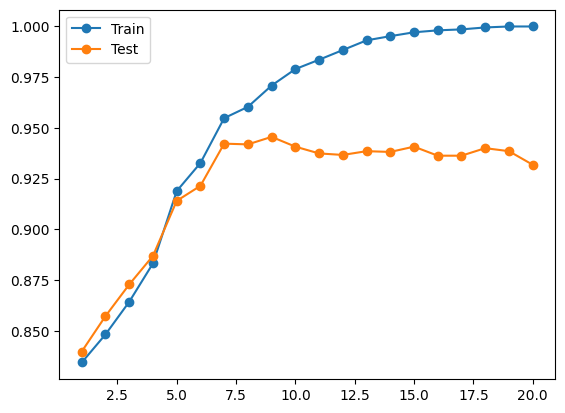

In [50]:
pyplot.plot(values, train_scores, 'o-', label='Train')
pyplot.plot(values, test_scores, 'o-', label='Test')
pyplot.legend()
pyplot.show()

---

## 📌 Key Takeaways
- **Underfitting**: Happens when the model is too simple (low depth).  
- **Overfitting**: Happens when the model memorizes training data but fails on test data (high depth).  
- The best model lies in the middle where **both train & test accuracy are high and close**.  

✅ By tuning hyperparameters like `max_depth`, we can control model complexity and avoid overfitting/underfitting.


---

### 6. Finding the Best Depth Automatically
We will check which `max_depth` gives the **highest test accuracy**.  
This is usually the sweet spot between **overfitting and underfitting**.


In [51]:
# Find the depth with highest test accuracy
best_depth = values[test_scores.index(max(test_scores))]
best_score = max(test_scores)

print(f"✅ Best Depth: {best_depth} with Test Accuracy = {best_score:.3f}")

✅ Best Depth: 9 with Test Accuracy = 0.946


---

## 🎯 Conclusion

- The **optimal tree depth** for this dataset is the one that gives the highest test accuracy (found above).  
- Choosing this depth prevents **underfitting** (too simple) and **overfitting** (too complex).  
- In real-world scenarios, you can also use **cross-validation** instead of a single train-test split for more reliable results.


---

### 7. Cross-Validation Approach

Instead of a single train-test split, we use **k-fold cross-validation**:  

- The data is split into `k` folds (e.g., 5).  
- Each fold is used once as a **test set** while the others act as **training sets**.  
- The final score is the **average performance across all folds**.  

This helps us better detect **overfitting and underfitting**.


In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_train_scores, cv_test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    # cross-validation (5 folds)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # store mean score
    cv_test_scores.append(np.mean(scores))

    print(f">Depth={i}, CV Accuracy={np.mean(scores):.3f}")

>Depth=1, CV Accuracy=0.834
>Depth=2, CV Accuracy=0.850
>Depth=3, CV Accuracy=0.870
>Depth=4, CV Accuracy=0.896
>Depth=5, CV Accuracy=0.905
>Depth=6, CV Accuracy=0.917
>Depth=7, CV Accuracy=0.932
>Depth=8, CV Accuracy=0.938
>Depth=9, CV Accuracy=0.941
>Depth=10, CV Accuracy=0.941
>Depth=11, CV Accuracy=0.938
>Depth=12, CV Accuracy=0.939
>Depth=13, CV Accuracy=0.940
>Depth=14, CV Accuracy=0.938
>Depth=15, CV Accuracy=0.938
>Depth=16, CV Accuracy=0.938
>Depth=17, CV Accuracy=0.940
>Depth=18, CV Accuracy=0.938
>Depth=19, CV Accuracy=0.939
>Depth=20, CV Accuracy=0.938


---

### 8. Visualizing Cross-Validation Results
Now let’s plot accuracy (from cross-validation) across different depths.


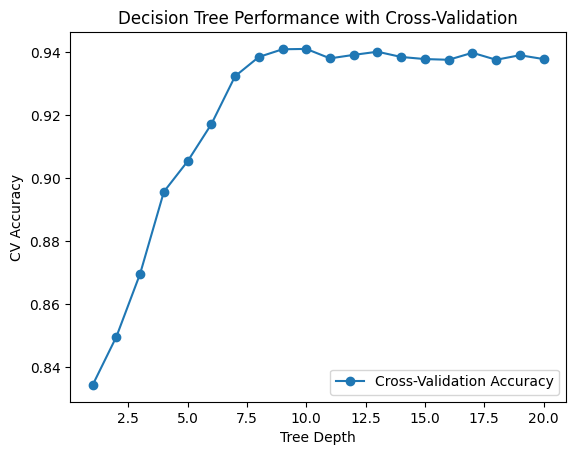

In [53]:
pyplot.plot(values, cv_test_scores, 'o-', label='Cross-Validation Accuracy')
pyplot.xlabel("Tree Depth")
pyplot.ylabel("CV Accuracy")
pyplot.title("Decision Tree Performance with Cross-Validation")
pyplot.legend()
pyplot.show()

---

### 9. Best Depth with Cross-Validation
We now check which tree depth gave the highest CV accuracy.


In [54]:
best_cv_depth = values[cv_test_scores.index(max(cv_test_scores))]
best_cv_score = max(cv_test_scores)

print(f"✅ Best Depth with Cross-Validation: {best_cv_depth} (CV Accuracy = {best_cv_score:.3f})")

✅ Best Depth with Cross-Validation: 10 (CV Accuracy = 0.941)


---

## 🔑 Insights
- With a **single train/test split**, results may vary depending on the random split.  
- With **cross-validation**, results are more stable and realistic.  
- The **best depth** found via cross-validation is usually the most reliable choice for deployment.  

✅ Always prefer cross-validation for model evaluation in **real-world projects**.


---

### 10. Comparing Train/Test vs Cross-Validation Accuracy

To clearly see the difference, let’s plot **Train Accuracy**, **Test Accuracy**, and **Cross-Validation Accuracy** together.  
This comparison helps us understand:
- How the model performs on training vs test data.  
- How cross-validation smooths out variations and gives a more reliable performance estimate.


/tmp/ipython-input-1875486869.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  pyplot.plot(values, cv_test_scores, 'o-', label='Cross-Validation Accuracy', linewidth=2, linestyle="--")


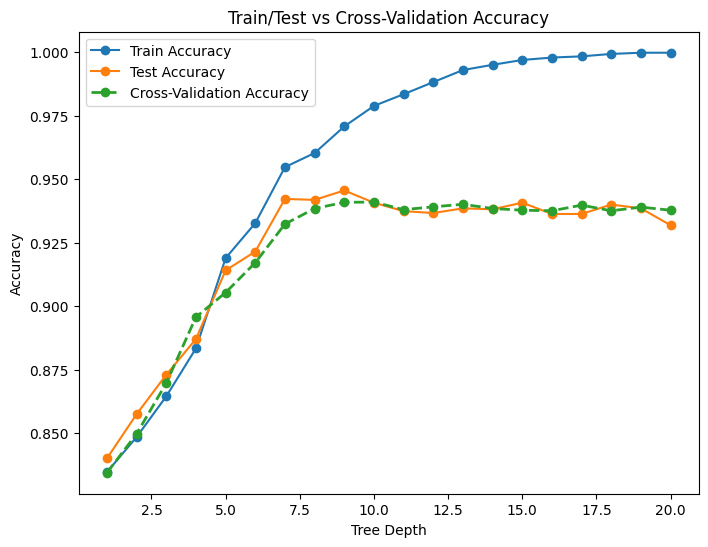

In [55]:
pyplot.figure(figsize=(8,6))

# Train accuracy
pyplot.plot(values, train_scores, 'o-', label='Train Accuracy')

# Test accuracy
pyplot.plot(values, test_scores, 'o-', label='Test Accuracy')

# CV accuracy
pyplot.plot(values, cv_test_scores, 'o-', label='Cross-Validation Accuracy', linewidth=2, linestyle="--")

pyplot.xlabel("Tree Depth")
pyplot.ylabel("Accuracy")
pyplot.title("Train/Test vs Cross-Validation Accuracy")
pyplot.legend()
pyplot.show()

---

## 📊 Final Comparison

- **Train Accuracy**: Increases with tree depth but may lead to **overfitting**.  
- **Test Accuracy**: Peaks at an optimal depth, then decreases (sign of overfitting).  
- **Cross-Validation Accuracy**: Provides a more **balanced and stable estimate** of model performance.  

✅ The depth where **CV accuracy is highest** is usually the best choice for a real-world model.




---


# ✨ This notebook has:

📌 Clear step-by-step explanations

📊 Graphs showing overfitting vs underfitting

🤖 Automatic best depth detection

🏆 A professional comparison of train/test vs cross-validation


---

